In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Finnish lakes data
lake = pd.read_csv('Data/Lake Data.txt', sep = '\t')

In [4]:
lake.head()

,Number,TP,Status,TN,TN.TP,Chl.a,pH,Secchi.Depth,Temperature,Latitude,Longitude,Cyanobacteria,Anabaena,Microcystis,MicrocystisDicot
0,12,24,Mesotrophic,440,11.0,12.0,8.0,2.2,20.4,61.01,22.12,0.0480,0.003,0.000,No
1,54,20,Mesotrophic,840,42.0,18.0,6.9,1.2,18.8,61.46,23.02,0.2184,0.058,0.000,No
2,15,8,Oligotrophic,370,46.3,3.2,7.0,5.3,18.5,61.03,23.15,0.0165,0.002,0.000,No
3,23,67,Eutrophic,990,14.8,36.0,7.4,0.4,19.4,61.24,23.19,0.0718,0.000,0.000,No
4,44,39,Eutrophic,810,20.8,26.0,8.9,0.5,20.1,60.50,23.29,0.3256,0.070,0.018,Yes


## Bivariate correlations bewteen numeric variables

<Axes: >

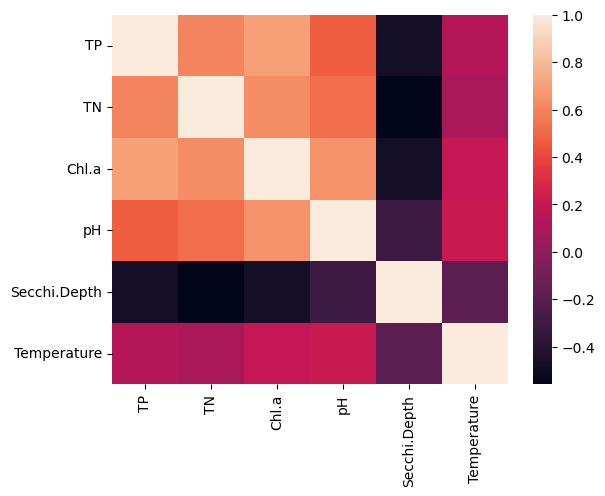

In [5]:
# Create a heatmap using the correlation coefficient of all the numeric variables
lake_subset = lake[['TP', 'TN', 'Chl.a', 'pH', 'Secchi.Depth', 'Temperature']]
c = lake_subset.corr()
sns.heatmap(c)

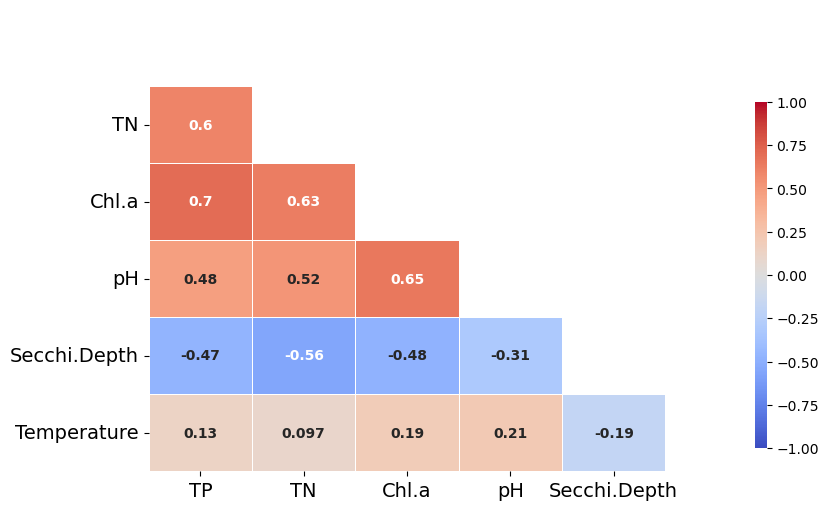

In [32]:
# Let's fix the heatmap
# We want values in the middle, bolded.
# Show just the lower triangular matrix.
# Pick a colormap.
# Play with the 'cbar_kws'.
# 'linewidth' sets the gap between rows.
plt.figure(figsize = [10,6])
mask = np.triu(c)
# print(mask)
sns.heatmap(
    c,
    annot = True,
    mask = mask,
    cmap = 'coolwarm',
    vmin = -1,
    vmax = 1,
    annot_kws = {'weight' : 'bold'},
    linewidth = 0.5,
    cbar_kws={'shrink':0.75,
              'aspect':30,
              'anchor':(-0.5,0.2)
     }
    
)
# Let's fix the labels 
# We can make the font larger and remove the redundant labels
ax = plt.gca()
ax.set_yticks(ax.get_yticks()[1:], labels = c.columns[1:], size = 14)
ax.set_xticks(ax.get_xticks()[:-1], labels = c.columns[:-1], size = 14)

# Format the colorbar
# Make the colorbar smaller


plt.show()

# Scatterplots

In [6]:
# Create a scatterplot using 'TN' and 'TP'.
# See if we can differentiate 'number = 44'.
plt.figure(figsize = [8,6])

# plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

## What if we want to shade in points by trophic status?

Consider the code below and the scatterplot it attempts to make. Based on what you see, answer the questions.
 
1) Look at the code for the legend: How did we get the entries to appear horizontally? What happens if you change markerscale to 4? What if you change handletextpad to 10? How do we center the legend?  
2) How do we add a vertical or horizontal line to the plot?  
3) Why are there blank points instead of circled points? Consider the logic of drawing circles around the points with the code as written.  

In [7]:
# How do these relate to lake status? We'd like to shade in the points by group
plt.figure(figsize = [8,6])


# Plot the points


# Suppose I really, really care about lakes that have microcystis and I want to put a circle around these



# Format the legend


# I'd like to add a line for the mean of TN and TP
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html


# Save the plot
# plt.savefig('Images/Scatter.png',bbox_inches='tight',facecolor='white')
# plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

## Making a grid of scatterplots

Consider the code below and the scatterplot it attempts to make. Based on what you see, answer the questions.

1) How does the loop work? How does it know where to put each plot and which variables to use?  
2) What does wspace: 0.2 do?  
3) What does the if i > 1 conditional do?  
4) What does the if i != 1 conditional do?   
5) What does f.transFigure do in the legend code?  
6) Should we set all of the x-axis scales and y-axis scales to be the same on all plots?  

In [8]:
# Create 4 scatterplots in a 2*2 grid, using 'TP', 'Chl.a', 'Secchi.Depth', and 'pH' as y-axis and 'TN' as x-axis.

# print(axes)



# Loop to create the plots
    
    
    # What does this do?
    
    
    # What does this do?
    
        
# plt.savefig('Images/GridScatter.png',bbox_inches = 'tight',facecolor='white')
# plt.show()

# Parallel Coordinates Plot

In [9]:
from pandas.plotting import parallel_coordinates as pcp
from matplotlib.patches import Patch

## Different data set

In [10]:
mic = pd.read_csv('Data/Microbial Data.csv')
mic.head()

,Streptococcus,Veillonella,Prevotella,Pseudomonas,Staphylococcus,CF
0,0.69,0.1023,0.2077,0.00,0.00,COPD
1,0.66,0.1122,0.2278,0.00,0.00,COPD
2,0.74,0.0759,0.1541,0.01,0.02,COPD
3,0.71,0.0924,0.1876,0.01,0.00,COPD
4,0.43,0.1848,0.3752,0.00,0.01,COPD


In [11]:
plt.figure(figsize = [12,8])
colors = ['cornflowerblue', 'crimson']

# plt.show()

<Figure size 1200x800 with 0 Axes>

Here are a few questions for you about the plot below:  
1) What are the axvlines that the keywords seem to be for? Where are they?  
2) Which gridlines does plt.grid affect?  
3) The Patches that we make for the handles....where do they end up?  
 

In [12]:
plt.figure(figsize = [12,8])
colors = ['cornflowerblue', 'crimson']

# How to make a fake legend

# plt.savefig('Images/PCP.png',bbox_inches ='tight',facecolor='whitesmoke')
# plt.show()

<Figure size 1200x800 with 0 Axes>

Let's make a similar plot for the lake data....what's different? What should we change in terms of truthfulness?

In [13]:
# lake_subset_2 = lake_subset.copy()
# lake_subset_2['Status'] = lake['Status']

plt.figure(figsize = [12,8])
colors = ['cornflowerblue', 'crimson', 'forestgreen']

<Figure size 1200x800 with 0 Axes>

## A different approach...and a lot more variables

In [14]:
# A lot more variables...use the digits data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [15]:
digits = load_digits()
# How do we get the data
X = digits['data']
y = digits['target']

In [16]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
y[0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 640x480 with 0 Axes>

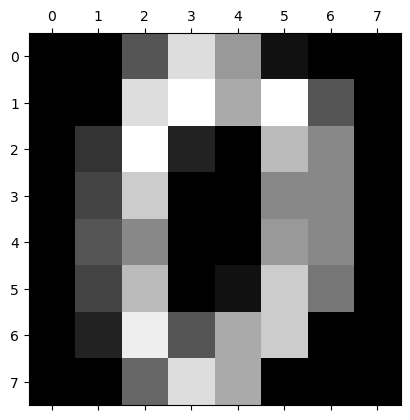

In [18]:
plt.gray()
select = 0 # Corresopnds to data in X[number]
plt.matshow(digits.images[select])
plt.show()

In [19]:
# Create PCA object


In [20]:
# Create a Dataframe


In [21]:
plt.figure(figsize = [8,8])
colors = ['cornflowerblue', 'slategrey', 'lightsalmon',
          'violet', 'forestgreen', 'firebrick', 'cyan',
         'lawngreen', 'thistle', 'black']

# plt.show()

<Figure size 800x800 with 0 Axes>

In [22]:
# Create t-SNE object


In [23]:
# Create a Dataframe


In [24]:
plt.figure(figsize = [8,8])
colors = ['cornflowerblue', 'slategrey', 'lightsalmon',
          'violet', 'forestgreen', 'firebrick', 'cyan',
         'lawngreen', 'thistle', 'black']

# plt.show()

<Figure size 800x800 with 0 Axes>